In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
import re
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kirilltiufanov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
all_data = pd.read_csv("data/all_data_m.csv")

In [3]:
all_data.iloc[5]

time                                                      2021-01-02
time.1                                                             6
tweetl_t           @StickmanSham @RANK10YGO &gt;Crack a Silly “Hm...
mentions_t                                                    [][][]
replies_count_t                                                 20.0
                                         ...                        
open                                                        0.006985
high                                                        0.007366
low                                                         0.006975
tv                                                                 1
Volume                                                    41947109.0
Name: 5, Length: 417, dtype: object

In [4]:
all_data["tv"].value_counts()

-1    1219
 1    1217
 0     362
Name: tv, dtype: int64

In [5]:
all_data_num = all_data.drop(["tweetl_t", "tweetl_l", "mentions_t", "mentions_l"], axis=1)

In [6]:
all_data_num

,time,time.1,replies_count_t,retweets_count_t,top_tw_t,likes_count_t,dogecoin_t,dogearmy_t,elonmusk_t,buy_t,...,ladybug_l,already_l,gt_l,subj_l,polar_l,open,high,low,tv,Volume
0,2021-01-02,1,61.0,173.0,2.0,1631.0,0.0,0.0,0.0,0.0,...,0,0,1,0.248972,0.035800,0.006921,0.007172,0.006709,-1,29383228.0
1,2021-01-02,2,26.0,23.0,2.0,271.0,0.0,0.0,0.0,0.0,...,0,0,0,0.262869,0.106507,0.006767,0.007038,0.006641,0,41415520.0
2,2021-01-02,3,22.0,160.0,2.0,866.0,1.0,0.0,0.0,0.0,...,0,0,1,0.316667,0.136352,0.006780,0.007179,0.006745,1,31058927.0
3,2021-01-02,4,268.0,555.0,5.0,1868.0,1.0,0.0,0.0,4.0,...,0,3,0,0.279962,0.081136,0.007065,0.007421,0.007055,1,31100758.0
4,2021-01-02,5,35.0,252.0,2.0,1762.0,1.0,0.0,0.0,0.0,...,0,1,0,0.314670,0.147348,0.007308,0.007315,0.006738,-1,57350444.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,2021-04-28,19,78.0,431.0,7.0,2989.0,3.0,1.0,1.0,0.0,...,6,1,0,0.329047,0.127826,0.316070,0.318500,0.310220,1,19257761.8
2794,2021-04-28,20,499.0,766.0,5.0,1751.0,1.0,0.0,0.0,0.0,...,4,2,0,0.306651,0.138017,0.317420,0.322030,0.314180,1,22698952.2
2795,2021-04-28,21,57.0,316.0,3.0,871.0,0.0,0.0,0.0,0.0,...,5,0,0,0.351950,0.142881,0.318320,0.325380,0.317000,1,22205970.7
2796,2021-04-28,22,1174.0,2506.0,5.0,11779.0,1.0,0.0,0.0,2.0,...,1,1,0,0.315244,0.118175,0.322610,0.322640,0.312610,-1,23157805.9


In [7]:
all_data_num = all_data_num.iloc[:,2:-1].apply(pd.to_numeric)

In [8]:
X = all_data_num.drop(columns='tv')
y = all_data_num['tv']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)

y_train = pd.DataFrame(y_train, columns =['tv'])
y_test  = pd.DataFrame(y_test, columns =['tv'])

In [10]:
y_train["tv"].value_counts()

-1    853
 1    849
 0    256
Name: tv, dtype: int64

<AxesSubplot:xlabel='tv', ylabel='count'>

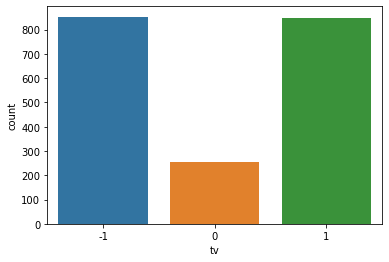

In [11]:
sns.countplot(x=y_train['tv'])

In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)
y.value_counts()

-1    1219
 1    1217
 0     362
Name: tv, dtype: int64

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
nb = CategoricalNB()
rf = RandomForestClassifier()

nb.fit(X_sm, y_sm['tv'])
rf.fit(X_sm, y_sm['tv'])

RandomForestClassifier()

In [14]:
y_train_res_pred_rf = rf.predict(X_sm)
y_test_pred_rf      = rf.predict(X_test)

In [15]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))


In [16]:
model_performance_class(y_sm, y_train_res_pred_rf, y_test, y_test_pred_rf)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 1.00
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       853
           0       1.00      1.00      1.00       853
           1       1.00      1.00      1.00       853

    accuracy                           1.00      2559
   macro avg       1.00      1.00      1.00      2559
weighted avg       1.00      1.00      1.00      2559

Results obtained for the TEST SET
The Cohen's Kappa is: 0.06
              precision    recall  f1-score   support

          -1       0.47      0.51      0.49       366
           0       0.21      0.20      0.21       106
           1       0.46      0.43      0.45       368

    accuracy                           0.44       840
   macro avg       0.38      0.38      0.38       840
weighted avg       0.43      0.44      0.43       840

